In [32]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
df = pd.read_csv("data.csv")

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 909 entries, 0 to 908
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    909 non-null    object 
 1   Movie Name            909 non-null    object 
 2   Timing(min)           909 non-null    object 
 3   Genre                 909 non-null    object 
 4   Language              909 non-null    object 
 5   year                  909 non-null    int64  
 6   production_companies  909 non-null    object 
 7   rating                909 non-null    float64
 8   votes                 909 non-null    int64  
 9   cast                  909 non-null    object 
 10  director              909 non-null    object 
 11  Release Date          909 non-null    object 
dtypes: float64(1), int64(2), object(9)
memory usage: 85.3+ KB


## Check for Null Values

In [35]:
df.isnull().sum()

ID                      0
Movie Name              0
Timing(min)             0
Genre                   0
Language                0
year                    0
production_companies    0
rating                  0
votes                   0
cast                    0
director                0
Release Date            0
dtype: int64

In [36]:
df.head()

,ID,Movie Name,Timing(min),Genre,Language,year,production_companies,rating,votes,cast,director,Release Date
0,tt1575647,Nuvvu Vasthavani,158 min,"Family, Romance",telugu,2000,['Super Good Combines'],6.6,259,"['Nagarjuna Akkineni', 'Simran', 'Mohammad Ali...",['V.R. Pratap'],05 Apr 2000 (India)
1,tt1582519,Khaleja,170 min,"Action, Comedy, Fantasy",telugu,2010,['Sri Kanakaratna Movies'],7.6,10202,"['Mahesh Babu', 'Anushka Shetty', 'Prakash Raj...",['Trivikram Srinivas'],07 Oct 2010 (India)
2,tt0464849,Yuvakudu,145 min,Romance,telugu,2000,['Great India Entertainments'],6.9,135,"['Sumanth', 'Jayasudha', 'Bhoomika Chawla', 'V...",['A. Karunakaran'],2000 (India)
3,tt7757972,Saakshyam,166 min,Action,telugu,2018,['Abhishek Pictures'],4.6,715,"['Sai Srinivas Bellamkonda', 'Pooja Hegde', 'R...",['Sriwass'],27 Jul 2018 (India)
4,tt4384242,Pataas,127 min,"Action, Comedy",telugu,2015,['NTR Arts'],6.5,928,"['Nandamuri Kalyan Ram', 'Ashutosh Rana', 'Sai...",['Anil Ravipudi'],23 Jan 2015 (India)


## Handling Runtime Column

In [37]:
df['Timing(min)'] = df['Timing(min)'].str.replace(' min', '', regex=False).astype(int)

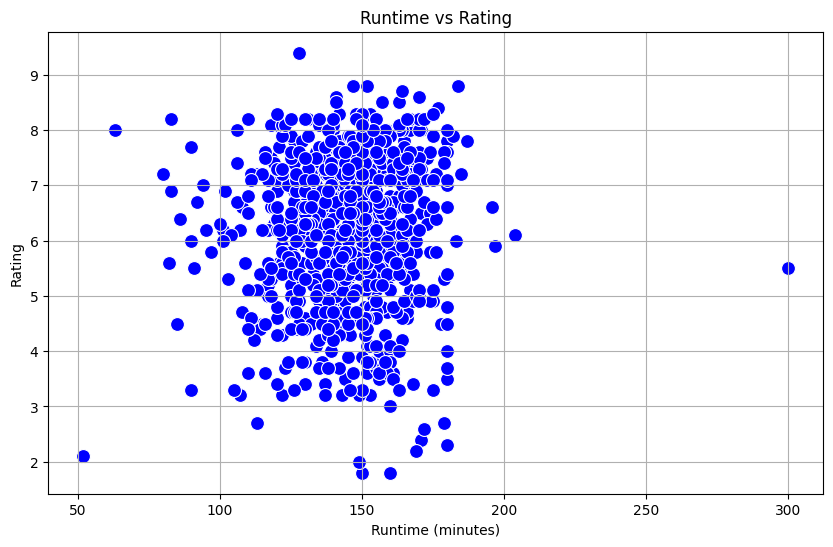

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Timing(min)', y='rating', color='blue', s=100)
plt.title('Runtime vs Rating')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Rating')
plt.grid(True)
plt.show()


## Removing short filmns and documentries which has runtime less than 100

In [39]:
df = df[df['Timing(min)'] >= 100]

In [40]:
df = df[df['Timing(min)'] < 250]

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 892 entries, 0 to 908
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    892 non-null    object 
 1   Movie Name            892 non-null    object 
 2   Timing(min)           892 non-null    int32  
 3   Genre                 892 non-null    object 
 4   Language              892 non-null    object 
 5   year                  892 non-null    int64  
 6   production_companies  892 non-null    object 
 7   rating                892 non-null    float64
 8   votes                 892 non-null    int64  
 9   cast                  892 non-null    object 
 10  director              892 non-null    object 
 11  Release Date          892 non-null    object 
dtypes: float64(1), int32(1), int64(2), object(8)
memory usage: 87.1+ KB


## Convert Release date column into datetime format

In [42]:
df['Release Date'] = pd.to_datetime(df['Release Date'].str.split('(').str[0].str.strip(), format='%d %b %Y', errors='coerce')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 892 entries, 0 to 908
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    892 non-null    object        
 1   Movie Name            892 non-null    object        
 2   Timing(min)           892 non-null    int32         
 3   Genre                 892 non-null    object        
 4   Language              892 non-null    object        
 5   year                  892 non-null    int64         
 6   production_companies  892 non-null    object        
 7   rating                892 non-null    float64       
 8   votes                 892 non-null    int64         
 9   cast                  892 non-null    object        
 10  director              892 non-null    object        
 11  Release Date          859 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2), object(7)
memory usage: 87.1+

In [44]:
df = df.dropna()

In [45]:
df['Release Month'] = df['Release Date'].dt.month

## Handling Genere Column by one hot encoding

In [46]:
df['Genre_list'] = df['Genre'].apply(lambda x: [genre.strip() for genre in x.split(', ')])

all_genres = set(genre for genres in df['Genre_list'] for genre in genres)

for genre in all_genres:
    df[genre] = df['Genre_list'].apply(lambda x: 1 if genre in x else 0)

df = df.drop(columns=['Genre_list'])


In [47]:
df.head()

,ID,Movie Name,Timing(min),Genre,Language,year,production_companies,rating,votes,cast,...,Biography,Family,Horror,Mystery,Crime,Western,Thriller,Adventure,War,Music
0,tt1575647,Nuvvu Vasthavani,158,"Family, Romance",telugu,2000,['Super Good Combines'],6.6,259,"['Nagarjuna Akkineni', 'Simran', 'Mohammad Ali...",...,0,1,0,0,0,0,0,0,0,0
1,tt1582519,Khaleja,170,"Action, Comedy, Fantasy",telugu,2010,['Sri Kanakaratna Movies'],7.6,10202,"['Mahesh Babu', 'Anushka Shetty', 'Prakash Raj...",...,0,0,0,0,0,0,0,0,0,0
3,tt7757972,Saakshyam,166,Action,telugu,2018,['Abhishek Pictures'],4.6,715,"['Sai Srinivas Bellamkonda', 'Pooja Hegde', 'R...",...,0,0,0,0,0,0,0,0,0,0
4,tt4384242,Pataas,127,"Action, Comedy",telugu,2015,['NTR Arts'],6.5,928,"['Nandamuri Kalyan Ram', 'Ashutosh Rana', 'Sai...",...,0,0,0,0,0,0,0,0,0,0
5,tt5948916,Manamantha,164,Drama,telugu,2016,['Vaarahi Chalana Chitram'],7.5,1055,"['Mohanlal', 'Gautami', 'Viswant Duddumpudi', ...",...,0,0,0,0,0,0,0,0,0,0


In [48]:
len(all_genres)

20

## Creating Successs Column

In [49]:
df.describe()

,Timing(min),year,rating,votes,Release Date,Release Month,Animation,Romance,Comedy,Drama,...,Biography,Family,Horror,Mystery,Crime,Western,Thriller,Adventure,War,Music
count,859.000000,859.000000,859.000000,859.000000,859,859.000000,859.000000,859.000000,859.000000,859.000000,...,859.000000,859.000000,859.000000,859.000000,859.00000,859.000000,859.000000,859.000000,859.000000,859.000000
mean,145.847497,2014.407451,6.127125,7428.295693,2014-11-29 17:22:42.048893952,6.325960,0.003492,0.258440,0.327125,0.500582,...,0.019790,0.037253,0.036088,0.036088,0.11525,0.001164,0.207218,0.047730,0.002328,0.002328
min,100.000000,2000.000000,1.800000,117.000000,2000-01-04 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,134.000000,2010.000000,5.300000,487.000000,2010-06-21 00:00:00,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,147.000000,2016.000000,6.300000,1191.000000,2016-04-14 00:00:00,6.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,157.000000,2019.000000,7.100000,4144.000000,2019-09-27 00:00:00,9.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
max,204.000000,2024.000000,9.400000,575262.000000,2024-10-10 00:00:00,12.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
std,17.162497,6.322472,1.299425,28106.678690,NaN,3.627583,0.059028,0.438032,0.469436,0.500291,...,0.139361,0.189491,0.186619,0.186619,0.31951,0.034120,0.405549,0.213318,0.048224,0.048224


In [50]:
# Function to determine the success based on Rating and Votes
def get_success(row):
    if row['rating'] < 6:
        return 'Flop'
    elif 6 <= row['rating'] < 7 and row['votes'] >= 490: # Thresholds Based on quantiles
        return 'Average'
    elif row['rating'] > 7 and row['votes'] >= 1200:
        return 'Hit'
    elif row['rating'] > 7 and row['votes'] < 1200:
        return 'Average'
    else:
        return 'Flop'

df['Success'] = df.apply(get_success, axis=1)



In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 859 entries, 0 to 908
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ID                    859 non-null    object        
 1   Movie Name            859 non-null    object        
 2   Timing(min)           859 non-null    int32         
 3   Genre                 859 non-null    object        
 4   Language              859 non-null    object        
 5   year                  859 non-null    int64         
 6   production_companies  859 non-null    object        
 7   rating                859 non-null    float64       
 8   votes                 859 non-null    int64         
 9   cast                  859 non-null    object        
 10  director              859 non-null    object        
 11  Release Date          859 non-null    datetime64[ns]
 12  Release Month         859 non-null    int32         
 13  Animation             859

## Cast and Crew

## Extracting Lead Actor, Director and Production company from cast and crew columns

In [52]:
import re

def extract_first_from_quotes(text):
  
    if isinstance(text, list):
        return text[0] if len(text) > 0 else None
    # If input is a string, extract first occurrence between quotes
    elif isinstance(text, str):
        match = re.search(r"'([^']*)'", text)
        return match.group(1) if match else None
    return None


df['Lead_Actor'] = df['cast'].apply(lambda x: extract_first_from_quotes(x) if pd.notnull(x) else None)
df['Main_Director'] = df['director'].apply(lambda x: extract_first_from_quotes(x) if pd.notnull(x) else None)
df['Main_Production_Company'] = df['production_companies'].apply(lambda x: extract_first_from_quotes(x) if pd.notnull(x) else None)

print(df[['Lead_Actor', 'Main_Director', 'Main_Production_Company']].head())


                 Lead_Actor          Main_Director  Main_Production_Company
0        Nagarjuna Akkineni            V.R. Pratap      Super Good Combines
1               Mahesh Babu     Trivikram Srinivas   Sri Kanakaratna Movies
3  Sai Srinivas Bellamkonda                Sriwass        Abhishek Pictures
4      Nandamuri Kalyan Ram          Anil Ravipudi                 NTR Arts
5                  Mohanlal  Chandra Sekhar Yeleti  Vaarahi Chalana Chitram


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 859 entries, 0 to 908
Data columns (total 37 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       859 non-null    object        
 1   Movie Name               859 non-null    object        
 2   Timing(min)              859 non-null    int32         
 3   Genre                    859 non-null    object        
 4   Language                 859 non-null    object        
 5   year                     859 non-null    int64         
 6   production_companies     859 non-null    object        
 7   rating                   859 non-null    float64       
 8   votes                    859 non-null    int64         
 9   cast                     859 non-null    object        
 10  director                 859 non-null    object        
 11  Release Date             859 non-null    datetime64[ns]
 12  Release Month            859 non-null    

In [54]:
df_success = df[df['Success'].isin(['Hit'])]

director_total_count = df.groupby('Main_Director')['Success'].count()
lead_total_count = df.groupby('Lead_Actor')['Success'].count()
company_total_count = df.groupby('Main_Production_Company')['Success'].count()

director_success_count = df_success.groupby('Main_Director')['Success'].count()
lead_success_count = df_success.groupby('Lead_Actor')['Success'].count()
company_success_count = df_success.groupby('Main_Production_Company')['Success'].count()


director_success_percentage = (director_success_count / director_total_count * 100).fillna(0)
lead_success_percentage = (lead_success_count / lead_total_count * 100).fillna(0)
company_success_percentage = (company_success_count / company_total_count * 100).fillna(0)

df['director_success'] = df['Main_Director'].map(director_success_percentage).fillna(0)
df['lead_success'] = df['Lead_Actor'].map(lead_success_percentage).fillna(0)
df['company_success'] = df['Main_Production_Company'].map(company_success_percentage).fillna(0)


In [55]:
df.head()

,ID,Movie Name,Timing(min),Genre,Language,year,production_companies,rating,votes,cast,...,Adventure,War,Music,Success,Lead_Actor,Main_Director,Main_Production_Company,director_success,lead_success,company_success
0,tt1575647,Nuvvu Vasthavani,158,"Family, Romance",telugu,2000,['Super Good Combines'],6.6,259,"['Nagarjuna Akkineni', 'Simran', 'Mohammad Ali...",...,0,0,0,Flop,Nagarjuna Akkineni,V.R. Pratap,Super Good Combines,0.000000,6.666667,0.0
1,tt1582519,Khaleja,170,"Action, Comedy, Fantasy",telugu,2010,['Sri Kanakaratna Movies'],7.6,10202,"['Mahesh Babu', 'Anushka Shetty', 'Prakash Raj...",...,0,0,0,Hit,Mahesh Babu,Trivikram Srinivas,Sri Kanakaratna Movies,66.666667,50.000000,50.0
3,tt7757972,Saakshyam,166,Action,telugu,2018,['Abhishek Pictures'],4.6,715,"['Sai Srinivas Bellamkonda', 'Pooja Hegde', 'R...",...,0,0,0,Flop,Sai Srinivas Bellamkonda,Sriwass,Abhishek Pictures,0.000000,12.500000,0.0
4,tt4384242,Pataas,127,"Action, Comedy",telugu,2015,['NTR Arts'],6.5,928,"['Nandamuri Kalyan Ram', 'Ashutosh Rana', 'Sai...",...,0,0,0,Average,Nandamuri Kalyan Ram,Anil Ravipudi,NTR Arts,0.000000,0.000000,0.0
5,tt5948916,Manamantha,164,Drama,telugu,2016,['Vaarahi Chalana Chitram'],7.5,1055,"['Mohanlal', 'Gautami', 'Viswant Duddumpudi', ...",...,0,0,0,Average,Mohanlal,Chandra Sekhar Yeleti,Vaarahi Chalana Chitram,28.571429,0.000000,0.0


## Model

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 859 entries, 0 to 908
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       859 non-null    object        
 1   Movie Name               859 non-null    object        
 2   Timing(min)              859 non-null    int32         
 3   Genre                    859 non-null    object        
 4   Language                 859 non-null    object        
 5   year                     859 non-null    int64         
 6   production_companies     859 non-null    object        
 7   rating                   859 non-null    float64       
 8   votes                    859 non-null    int64         
 9   cast                     859 non-null    object        
 10  director                 859 non-null    object        
 11  Release Date             859 non-null    datetime64[ns]
 12  Release Month            859 non-null    

## Removing All the categorical Columns

In [57]:
columns_to_drop = ['ID','Movie Name','Genre','Language','Release Date','rating','production_companies','cast','director','Lead_Actor','Main_Director','Main_Production_Company']

df = df.drop(columns=columns_to_drop)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 859 entries, 0 to 908
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Timing(min)       859 non-null    int32  
 1   year              859 non-null    int64  
 2   votes             859 non-null    int64  
 3   Release Month     859 non-null    int32  
 4   Animation         859 non-null    int64  
 5   Romance           859 non-null    int64  
 6   Comedy            859 non-null    int64  
 7   Drama             859 non-null    int64  
 8   Sport             859 non-null    int64  
 9   Musical           859 non-null    int64  
 10  Sci-Fi            859 non-null    int64  
 11  Action            859 non-null    int64  
 12  Fantasy           859 non-null    int64  
 13  History           859 non-null    int64  
 14  Biography         859 non-null    int64  
 15  Family            859 non-null    int64  
 16  Horror            859 non-null    int64  
 17  My

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Feature selection
X = df.drop(columns=['Success']) 
y = df['Success']  

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.6976744186046512

Classification Report:
               precision    recall  f1-score   support

     Average       0.47      0.41      0.44        44
        Flop       0.74      0.74      0.74        88
         Hit       0.80      0.93      0.86        40

    accuracy                           0.70       172
   macro avg       0.67      0.69      0.68       172
weighted avg       0.69      0.70      0.69       172



## Hyperparameter Tuning Using Random Search CV

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Feature selection
X = df.drop(columns=['Success'])  
y = df['Success'] 

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for RandomizedSearchCV
param_distributions = {
    'n_estimators': [50, 100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_distributions,
    n_iter=100,  # Number of parameter settings sampled
    scoring='accuracy',
    cv=3,  # Number of cross-validation folds
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best Cross-Validation Score:", random_search.best_score_)

best_rf_model = random_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

print("Test Set Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': False}
Best Cross-Validation Score: 0.7248908296943232
Test Set Accuracy: 0.6569767441860465

Classification Report:
               precision    recall  f1-score   support

     Average       0.37      0.36      0.37        44
        Flop       0.71      0.66      0.68        88
         Hit       0.83      0.97      0.90        40

    accuracy                           0.66       172
   macro avg       0.64      0.67      0.65       172
weighted avg       0.65      0.66      0.65       172



In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Feature selection
X = df.drop(columns=['Success'])  
y = df['Success']  

# Encode target labels into numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Converts ['Average', 'Flop', 'Hit'] to [0, 1, 2]

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"{model_name} Performance:")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.2f}\n")
    return accuracy

xgb = XGBClassifier(objective='multi:softmax', num_class=len(label_encoder.classes_), random_state=42)
xgb.fit(X_train, y_train)
xgb_accuracy = evaluate_model(xgb, X_test, y_test, "XGBoost")


lgbm = LGBMClassifier(objective='multiclass', random_state=42)
lgbm.fit(X_train, y_train)
lgbm_accuracy = evaluate_model(lgbm, X_test, y_test, "LightGBM")


catboost = CatBoostClassifier(verbose=0, random_state=42)
catboost.fit(X_train, y_train)
catboost_accuracy = evaluate_model(catboost, X_test, y_test, "CatBoost")


print("Model Comparison:")
print(f"XGBoost Accuracy: {xgb_accuracy:.2f}")
print(f"LightGBM Accuracy: {lgbm_accuracy:.2f}")
print(f"CatBoost Accuracy: {catboost_accuracy:.2f}")


XGBoost Performance:
              precision    recall  f1-score   support

     Average       0.50      0.50      0.50        44
        Flop       0.76      0.72      0.74        88
         Hit       0.84      0.95      0.89        40

    accuracy                           0.72       172
   macro avg       0.70      0.72      0.71       172
weighted avg       0.71      0.72      0.71       172

XGBoost Accuracy: 0.72

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000231 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 432
[LightGBM] [Info] Number of data points in the train set: 687, number of used features: 18
[LightGBM] [Info] Start training from score -1.224067
[LightGBM] [Info] Start training from score -0.712251
[LightGBM] [Info] Start training from score -1.535122
[LightGBM] [Warning] No further splits with po